In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.preprocessing import normalize, Normalizer
import seaborn as sns

In [313]:
plt.style.use('ggplot')

## Data Exploration

In [404]:
# reading the data using pandas routine
data = pd.read_csv('data/training_data.csv')

In [3]:
# general information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
PatientID    1000 non-null int64
Resp         1000 non-null int64
PR Seq       920 non-null object
RT Seq       1000 non-null object
VL-t0        1000 non-null float64
CD4-t0       1000 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [4]:
# five point discriptive statistics, and stander deviation
data.describe()

,PatientID,Resp,VL-t0,CD4-t0
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,0.206000,4.29721,279.638000
std,288.819436,0.404633,0.70478,198.186712
min,1.000000,0.000000,2.70000,0.000000
25%,250.750000,0.000000,3.70000,132.750000
50%,500.500000,0.000000,4.30000,249.000000
75%,750.250000,0.000000,4.80000,383.250000
max,1000.000000,1.000000,6.00000,1589.000000


We can see from the above result that there is <b>80 observations missing</b> in <i>PR Seq</i> variable, and the scale of the <i>CD4-t0</i> variable is different from <i>VL-t0</i> suggesting to do some rescaling to the data. 

In [4]:
data.head()

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.3,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.6,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.2,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.7,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.5,572


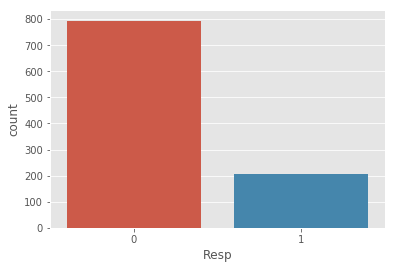

In [97]:
# Now lets check the class distributions
sns.countplot("Resp",data=data)

In [130]:
N,D = data.shape
first_pct = np.sum(data.iloc[:,1] == 0)/N
second_pct = np.sum(data.iloc[:,1] == 1)/N

print('First Class precentage: %{:2f}'.format(100*first_pct))
print('Second Class precentage: %{:2f}'.format(100*second_pct))

First Class precentage: %79.400000
Second Class precentage: %20.600000


In [5]:
# group the data by the target variable 
data_grp= data.groupby('Resp')

In [6]:
# seeing the count perb responce
data_grp.count()

,PatientID,PR Seq,RT Seq,VL-t0,CD4-t0
Resp,,,,,
0,794,733,794,794,794
1,206,187,206,206,206


In [7]:
# general discribtive per-resonce
data_grp.describe()

CD4-t0                                                              \
      count        mean         std  min     25%    50%     75%     max   
Resp                                                                      
0     794.0  291.607053  193.778515  1.0  142.50  256.5  400.75  1219.0   
1     206.0  233.504854  208.470452  0.0   87.75  195.5  339.50  1589.0   

     PatientID             ...                   VL-t0                      \
         count        mean ...      75%     max  count      mean       std   
Resp                       ...                                               
0        794.0  459.840050 ...   723.75  1000.0  794.0  4.167179  0.678766   
1        206.0  657.218447 ...   811.25   990.0  206.0  4.798398  0.566092   

                               
      min  25%  50%  75%  max  
Resp                           
0     2.7  3.6  4.1  4.6  6.0  
1     2.9  4.4  4.8  5.2  5.9  

[2 rows x 24 columns]

In [96]:
# general data correlation
data.corr()

,PatientID,Resp,VL-t0,CD4-t0
PatientID,1.000000,0.276525,0.028696,0.085903
Resp,0.276525,1.000000,0.362400,-0.118626
VL-t0,0.028696,0.362400,1.000000,-0.416179
CD4-t0,0.085903,-0.118626,-0.416179,1.000000


Text(0.5,1,'Correlation heatmap')

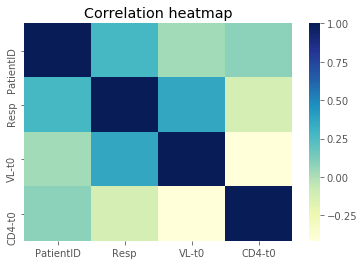

In [50]:
# general data correlation heatmap
sbn.heatmap(data.corr(),cmap='YlGnBu')
plt.title('Correlation heatmap')

In [8]:
data_grp.count()

,PatientID,PR Seq,RT Seq,VL-t0,CD4-t0
Resp,,,,,
0,794,733,794,794,794
1,206,187,206,206,206


In [53]:
# getting the sequences length distribution 
PR_len = [len(i) for i in data[pd.isnull(data['PR Seq']) != True]['PR Seq']]
RT_len = [len(i) for i in data[pd.isnull(data['RT Seq']) != True]['RT Seq']]

In [56]:
PR_len = pd.DataFrame(PR_len, columns=['Length'])
RT_len = pd.DataFrame(RT_len, columns=['Length'])

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0.

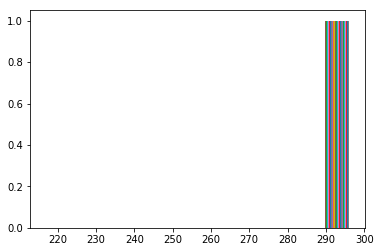

In [70]:
plt.hist(PR_len);

In [67]:
RT_len.describe()

,Length
count,1000.000000
mean,951.964000
std,200.380651
min,579.000000
25%,866.250000
50%,903.000000
75%,957.000000
max,1482.000000


In [65]:
np.sum(RT_len == 903)

Length    88
dtype: int64

In [79]:
len(list(range(579,1482,100)))

10

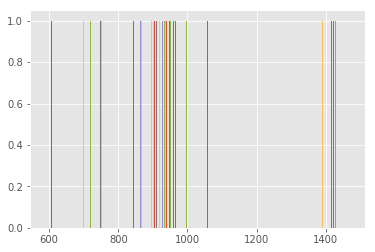

In [80]:
plt.hist(RT_len, bins=list(range(579,1482,100)));

In [13]:
data.columns

Index(['PatientID', 'Resp', 'PR Seq', 'RT Seq', 'VL-t0', 'CD4-t0'], dtype='object')

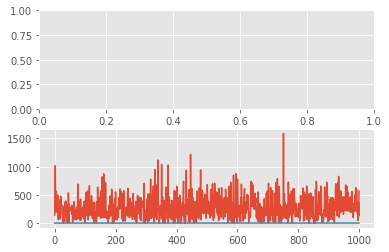

In [49]:
plt.subplots(2,1)
f, (ax1, ax2) = plt.subplots(2, 1)
data['CD4-t0'].plot()
data['VL-t0'].plot()

Resp
0    AxesSubplot(0.125,0.125;0.775x0.343182)
1    AxesSubplot(0.125,0.125;0.775x0.343182)
Name: CD4-t0, dtype: object

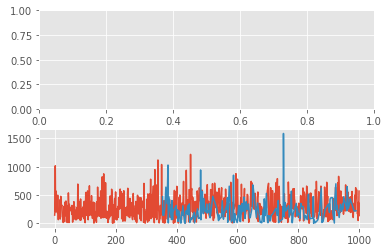

In [29]:
plt.subplots(2,1)
data_grp['CD4-t0'].plot()

Resp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: VL-t0, dtype: object

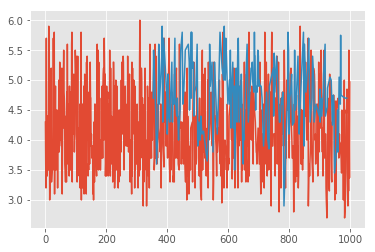

In [28]:
data_grp['VL-t0'].plot()

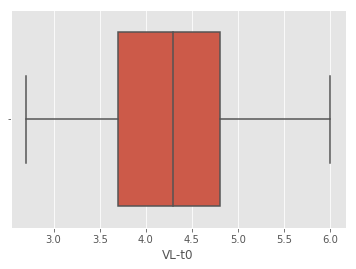

In [253]:
sns.boxplot(data['VL-t0'])
plt.savefig('VL_Boxplot.jpg')

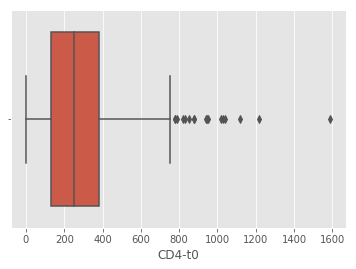

In [254]:
sns.boxplot(data['CD4-t0'])
plt.savefig('CD4_Boxplot.jpg')

It is clear that from box plots and the tables the VL-t0 is normally distributed with mean balanced between the 1st quantile and 3ed quantile with no outliers, while the CD4-t0 is is squied to the right with serveral outliers taths suggets treatment with some preprocessing e.g. normalization.

Text(0,0.5,'CD4-t0')

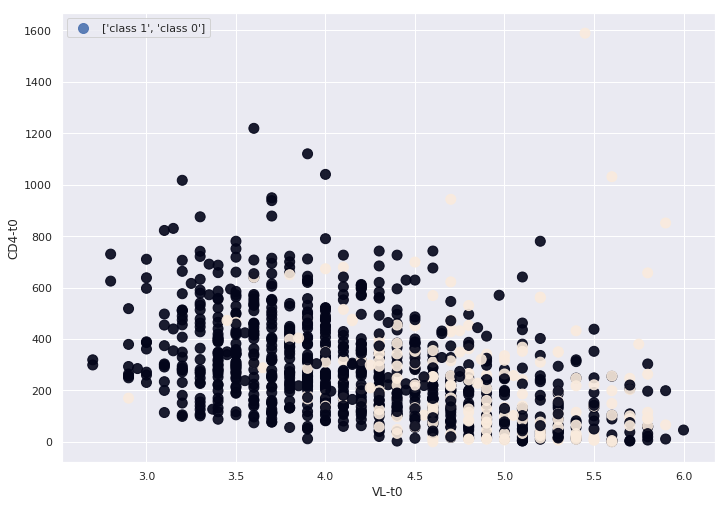

In [344]:
plt.scatter(data['VL-t0'],data['CD4-t0'], c= data['Resp'],s =100, alpha=0.9 ,label = ['class 1','class 0'] )
plt.legend()
plt.xlabel('VL-t0')
plt.ylabel('CD4-t0')
#plt.savefig('scatter.jpg')

Text(0,0.5,'CD4-t0')

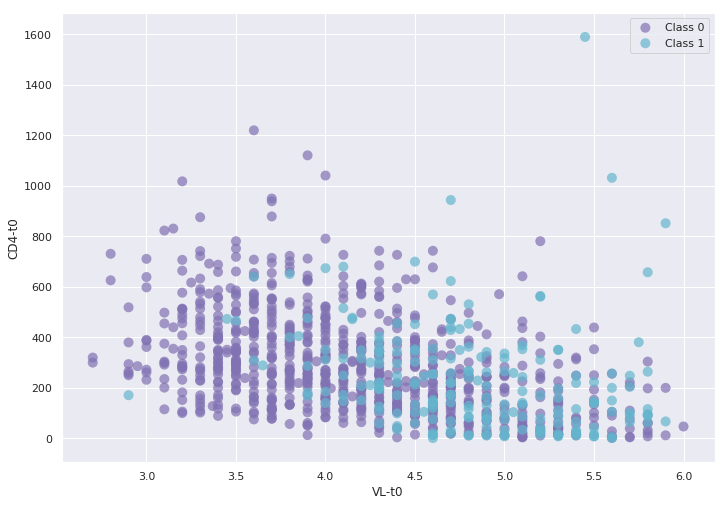

In [405]:
fig, ax = plt.subplots()
target_lbl = ['Class 0', 'Class 1']
i = 0
for color in ['m', 'c']:
    ax.scatter(data[data['Resp'] == i]['VL-t0'], data[data['Resp'] == i]['CD4-t0'], c=color, s=100, label=target_lbl[i],
               alpha=0.7, edgecolors='none')
    i+=1

ax.legend()

# plt.scatter(data['VL-t0'],data['CD4-t0'], c= data['Resp'], alpha=0.9 ,label = ['class 1','class 0'] )
# plt.legend()
plt.xlabel('VL-t0')
plt.ylabel('CD4-t0')
plt.savefig('scatter.jpg')

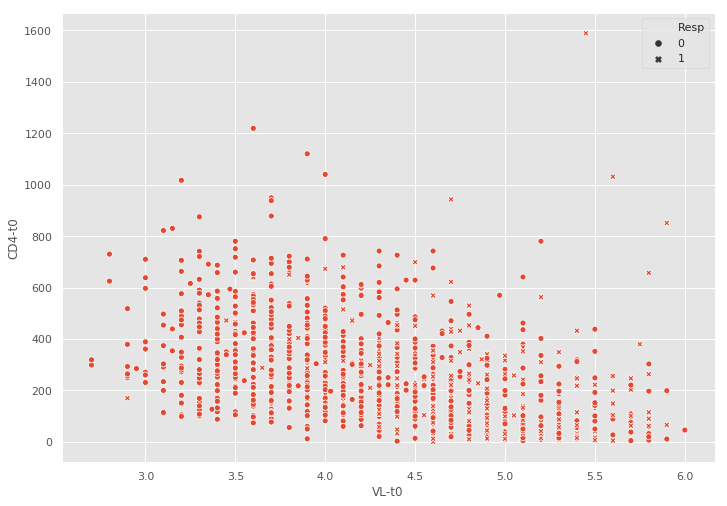

In [315]:
sbn.scatterplot(data['VL-t0'],data['CD4-t0'], style= data['Resp'])

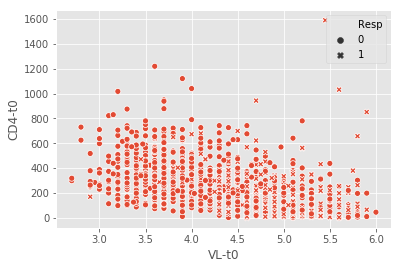

In [37]:
sbn.scatterplot(data['VL-t0'],data['CD4-t0'], style= data['Resp'])

In [91]:
data[np.log(data['CD4-t0']) > 0]

/home/merghaney/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.30,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.60,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.20,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.70,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.50,572
5,6,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCTCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.90,239
6,7,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCTCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTGAAATTAAAGCCAGGAA...,3.40,221
7,8,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCTCAATAAAGATAG...,CCCATAAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.40,384
8,9,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCTCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.90,309
9,10,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCTCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.10,184


In [92]:
data[np.log(data['CD4-t0']) > 0].corrwith(np.log(data['CD4-t0'])[np.log(data['CD4-t0']) > 0])

/home/merghaney/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


PatientID    0.078911
Resp        -0.155125
VL-t0       -0.489478
CD4-t0       0.833560
dtype: float64

In [320]:
sns.set()

/home/merghaney/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


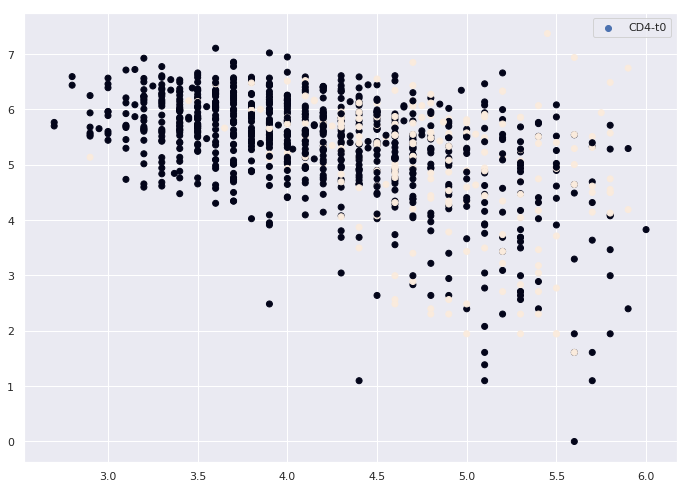

In [321]:
plt.scatter(data['VL-t0'],np.log(data['CD4-t0']), c= data['Resp'])
plt.legend()

/home/merghaney/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


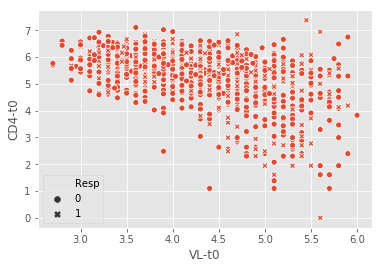

In [93]:
sbn.scatterplot(data['VL-t0'],np.log(data['CD4-t0']), style= data['Resp']);

## Dimentionality reduction
The data we have is highly nonlinera as suggested by the scater plots, as so we are considering the dimentionality reduction as a preprocessig and feature engenering step to better represent te data for the classifiers.

In [132]:
# dimentionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(2) # to get the independent representation
tsne = TSNE(2) # state of the art / the data is nonlinear

In [133]:
from sklearn.manifold import Isomap

In [134]:
# data normalizors
from sklearn.preprocessing import normalize, Normalizer

In [135]:
iso = Isomap() # follwing the assumption that the data lives in nonlinear manifold.

In [302]:
# working with neumaric data
num_data = data[['VL-t0','CD4-t0']]

In [361]:
# fit the dimensionality reduction algorithm 

pca_data = pca.fit_transform(normalize(num_data))
tsne_data = tsne.fit_transform(normalize(num_data))
iso_data = iso.fit_transform(normalize(num_data))

In [362]:
pca_data[:,0]

array([-2.33617767e-02, -3.55832389e-02, -4.71413910e-02, -2.51524321e-02,
       -4.44897456e-02, -3.53620606e-02, -3.61992094e-02, -3.97167280e-02,
       -3.86754598e-02, -3.00039940e-02, -4.36652136e-02, -2.33680310e-02,
        2.21956245e-02, -3.32927244e-02, -3.83479684e-02, -3.08963645e-02,
       -1.32195894e-02, -4.11079920e-02,  1.14879758e-02, -3.07189796e-02,
       -4.37889011e-02, -4.12522183e-02, -3.98014858e-02, -3.89563452e-02,
       -3.94924768e-02, -2.31277341e-02, -2.84338947e-03,  1.78970236e-02,
        2.69669489e-01,  3.78069290e-02, -4.06613627e-02, -3.19701829e-02,
        5.01041938e-02,  9.94865114e-02, -4.04505682e-02, -4.08123372e-02,
       -1.98154778e-02, -4.15875900e-02, -2.78584058e-02, -3.17233343e-02,
       -3.98159123e-02,  2.44280365e-01, -3.48733031e-02, -3.85702343e-02,
       -2.69808704e-02, -4.36465076e-02, -4.07376038e-02,  3.19796026e-01,
       -3.77541652e-02, -3.64282733e-02, -3.35395421e-02, -3.34000773e-02,
       -3.66607157e-02, -

In [375]:
pca_data[data['Resp'] == 0][:,0]

array([-2.33617767e-02, -3.55832389e-02, -4.71413910e-02, -2.51524321e-02,
       -4.44897456e-02, -3.53620606e-02, -3.61992094e-02, -3.97167280e-02,
       -3.86754598e-02, -3.00039940e-02, -4.36652136e-02, -2.33680310e-02,
        2.21956245e-02, -3.32927244e-02, -3.83479684e-02, -3.08963645e-02,
       -1.32195894e-02, -4.11079920e-02,  1.14879758e-02, -3.07189796e-02,
       -4.37889011e-02, -4.12522183e-02, -3.98014858e-02, -3.89563452e-02,
       -3.94924768e-02, -2.31277341e-02, -2.84338947e-03,  1.78970236e-02,
        2.69669489e-01,  3.78069290e-02, -4.06613627e-02, -3.19701829e-02,
        5.01041938e-02,  9.94865114e-02, -4.04505682e-02, -4.08123372e-02,
       -1.98154778e-02, -4.15875900e-02, -2.78584058e-02, -3.17233343e-02,
       -3.98159123e-02,  2.44280365e-01, -3.48733031e-02, -3.85702343e-02,
       -2.69808704e-02, -4.36465076e-02, -4.07376038e-02,  3.19796026e-01,
       -3.77541652e-02, -3.64282733e-02, -3.35395421e-02, -3.34000773e-02,
       -3.66607157e-02, -

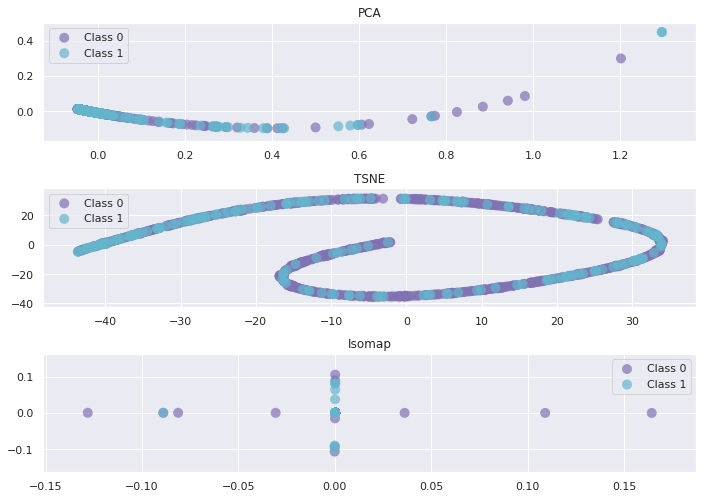

In [383]:
# ploting 
f, (ax1, ax2, ax3) = plt.subplots(3, 1,)
f.subplots_adjust(hspace = 0.4, wspace = 0.2)

ax1.set_title('PCA')
i = 0
for color in ['m', 'c']:
    ax1.scatter(pca_data[data['Resp'] == i][:,0], pca_data[data['Resp'] == i][:,1], c=color, s=100, label=target_lbl[i],
               alpha=0.7, edgecolors='none')
    i+=1
ax1.legend()   
#ax1.scatter(pca_data[:,0],pca_data[:,1], c = data['Resp'])

ax2.set_title('TSNE')
#ax2.scatter(tsne_data[:,0],tsne_data[:,1], c = data['Resp'])
i = 0
for color in ['m', 'c']:
    ax2.scatter(tsne_data[data['Resp'] == i][:,0], tsne_data[data['Resp'] == i][:,1], c=color, s=100, label=target_lbl[i],
               alpha=0.7, edgecolors='none')
    i+=1
ax2.legend() 

ax3.set_title('Isomap')
#ax3.scatter(iso_data[:,0],iso_data[:,1], c = data['Resp'])
i = 0
for color in ['m', 'c']:
    ax3.scatter(iso_data[data['Resp'] == i][:,0], iso_data[data['Resp'] == i][:,1], c=color, s=100, label=target_lbl[i],
               alpha=0.7, edgecolors='none')
    i+=1
ax3.legend() 

plt.savefig('DR_scatter.jpg')

## Clustering
Clusering the data as a baseline for the classifiers.

In [303]:
from sklearn.cluster import KMeans

kmean = KMeans(2)

In [304]:
kmean.fit(normalize(num_data))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [305]:
kmean.cluster_centers_

array([[0.03345482, 0.9980114 ],
       [0.63067671, 0.70701453]])

Text(0.5,1,'Clustering result')

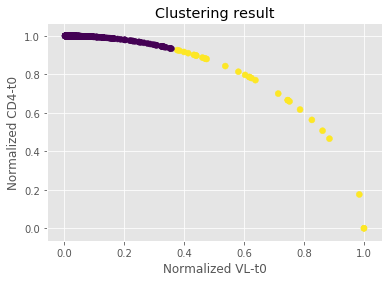

In [154]:
# ploting clusering result
plt.scatter(normalize(num_data)[:,0],normalize(num_data)[:,1], c= kmean.labels_)
plt.xlabel('Normalized VL-t0')
plt.ylabel('Normalized CD4-t0')
plt.title('Clustering result')

### Evaluation criteria
As the data is unbalance we are going to look at confusion matrix values like recal and f1 score.

In [155]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

In [306]:
confusion_matrix(data['Resp'],kmean.labels_)

array([[778,  16],
       [193,  13]])

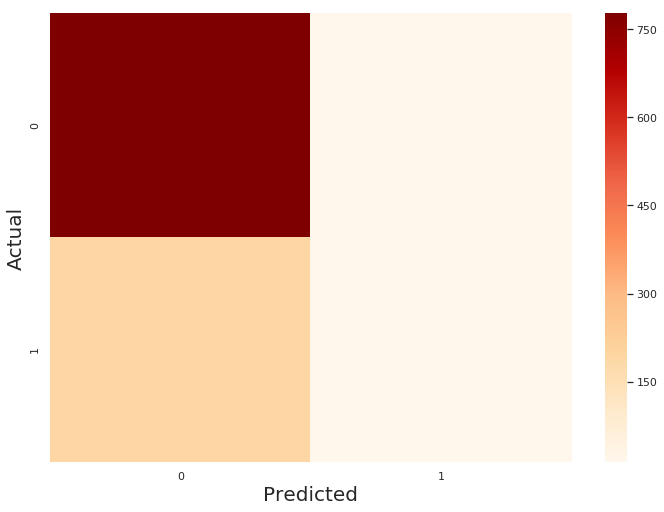

In [310]:
sns.heatmap(confusion_matrix(data['Resp'],kmean.labels_), cmap='OrRd')
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.savefig('Kmeans_confusion_matrix.jpg')

In [161]:
# Classification report
print(classification_report(data['Resp'],kmean.labels_))

             precision    recall  f1-score   support

          0       0.80      0.98      0.88       794
          1       0.45      0.06      0.11       206

avg / total       0.73      0.79      0.72      1000



Trying Randome forest to see the feature importance

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
rf_clf = RandomForestClassifier()

In [164]:
rf_clf.fit(normalize(num_data), data['Resp'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
print(classification_report(data['Resp'],rf_clf.predict(normalize(num_data))))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       794
          1       0.93      0.80      0.86       206

avg / total       0.95      0.95      0.94      1000



In [168]:
# getting featrure importance
rf_clf.feature_importances_

array([0.54146953, 0.45853047])

### Featuer importance from RF

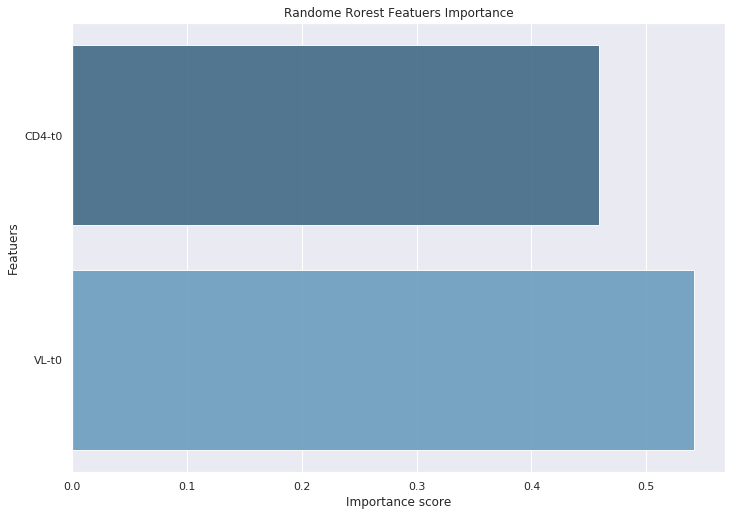

In [283]:
# barplot of the frequency distribution of a categorical feature 
sns.set(rc={'figure.figsize':(11.7,8.27)})
#country_count = cat_data['Country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(feat_imp.values.ravel(),feat_imp.index ,alpha=0.9, palette='Blues_d')

plt.title('Randome Rorest Featuers Importance')
plt.ylabel('Featuers', fontsize=12)
plt.xlabel('Importance score', fontsize=12)
plt.savefig('Importance_score.jpg')
plt.show()

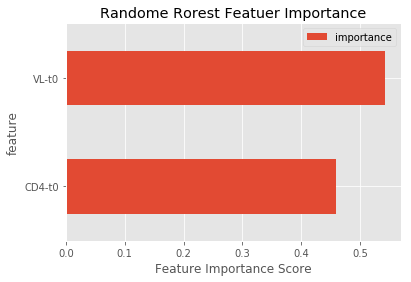

In [262]:

feat_imp = pd.DataFrame({'importance':np.array([0.54146953, 0.45853047])})    
feat_imp['feature'] = data.columns[-2:]
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
# feat_imp = feat_imp.iloc[:top_n]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title='Randome Rorest Featuer Importance')#, figsize=figsize)
plt.xlabel('Feature Importance Score')
plt.show()

In [251]:
rf_clf.feature_importances_

array([0.10743031, 0.04745441, 0.06397147, 0.07444814, 0.05948461,
       0.12504163, 0.0694332 , 0.02817051, 0.03040662, 0.06556288,
       0.06104207, 0.03168521, 0.0426818 , 0.05944162, 0.03542674,
       0.03971498, 0.05860379])

## Modeling

In [10]:
from sklearn.cross_validation import train_test_split

In [ ]:
trainX, trainY, testX, testY = train_test_split()

As the data is small we are going to use Kfold cross validation

In [169]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True)
print(kf)  

# KFolde training helper function

def KFold_train(X,y,kf,clf, metrics, print_report = False):
    kf.get_n_splits(X)
    n, d = kf.n_splits, len(metrics)
    score = np.zeros((n, d))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train,y_train)
        pred_y = clf.predict(X_test)
        for metric, j in zip(metrics, range(d)):
            score[i,j] = metric(y_test, pred_y)
            
        if print_report:
            print(classification_report(y_test, pred_y))
            print(score[i,:])
        i+=1
    
    return np.mean(score, axis=0)

KFold(n_splits=3, random_state=None, shuffle=True)


## Classifiers

The problem is nonlinear as so weare going to use nonlinera classifiers

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier

rf_clf = RandomForestClassifier()
svm_clf = SVC()
logr_clf = LogisticRegressionCV()
gp_clf = GaussianProcessClassifier()
gnb_clf = GaussianNB()
qda_clf = QuadraticDiscriminantAnalysis()
gb_clf = GradientBoostingClassifier()

In [171]:
# normalize the data as suggested by the scale of the variables

X = normalize(num_data)
y = data['Resp']

In [172]:
# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [212]:
print('Random Forest:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, rf_clf,[accuracy_score, precision_score, recall_score]))

print('\nSupport Vector Machine:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

print('\nLogistic Regression:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, logr_clf,[accuracy_score, precision_score, recall_score]))

print('\nGaussian Process:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, gp_clf,[accuracy_score, precision_score, recall_score]))

print('\nGaussianNB:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, gnb_clf,[accuracy_score, precision_score, recall_score]))

print('\nQuadratic Discriminant Analysis:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, qda_clf,[accuracy_score, precision_score, recall_score]))

print('\nGradient Boosting Classifier:')
print(' accuracy    precision    recall')
print(KFold_train(X,y,kf, qda_clf,[accuracy_score, precision_score, recall_score]))
KFold_train(X,y,kf, gb_clf,[accuracy_score, precision_score, recall_score])

Random Forest:
 accuracy    precision    recall
[0.72001942 0.31947712 0.28597112]

Support Vector Machine:
 accuracy    precision    recall
[0.7939886 0.        0.       ]

Logistic Regression:
 accuracy    precision    recall


/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/

[0.79399759 0.         0.        ]

Gaussian Process:
 accuracy    precision    recall


/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.79295163 0.11111111 0.0045045 ]

GaussianNB:
 accuracy    precision    recall
[0.79099159 0.47462864 0.0974912 ]

Quadratic Discriminant Analysis:
 accuracy    precision    recall
[0.78299857 0.41031746 0.12362108]

Gradient Boosting Classifier:
 accuracy    precision    recall
[0.78197958 0.39896045 0.1196115 ]


array([0.78501256, 0.43937198, 0.14252028])

### Results mini discussion 
<b>Random Forest</b> one of the heights accuracy, not bad recall and precision score.

<b>Support Vector Machine</b> one of the heights accuracy, bad recall and precision score indicating bad prediction to the minority class.

<b>Logistic Regression</b> one of the heights accuracy, bad recall and precision score indicating bad prediction to the minority class.

<b>Gaussian Process</b> one of the heights accuracy, bad recall and precision score indicating bad prediction to the minority class.

<b>GaussianNB</b> one of the heights accuracy, not bad recall and precision score.

<b>Quadratic Discriminant Analysis</b> one of the heights accuracy, not bad recall and precision score.

<b>Gradient Boosting Classifier</b> one of the heights accuracy, not bad recall and precision score.

RandomForest, Gradient Boosting Classifier and Quadratic Discriminant Analysis are the best classifers we have balancing the metrics as so we are going to digg more in them.

In [163]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [164]:
KFold_train(iso_data,y,kf, knn_clf,[accuracy_score, precision_score, recall_score, f1_score], print_report= True)

             precision    recall  f1-score   support

          0       0.76      0.94      0.84       252
          1       0.26      0.06      0.10        82

avg / total       0.63      0.73      0.66       334

[0.72754491 0.26315789 0.06097561 0.0990099 ]
             precision    recall  f1-score   support

          0       0.82      0.94      0.88       270
          1       0.33      0.13      0.18        63

avg / total       0.73      0.79      0.75       333

[0.78678679 0.33333333 0.12698413 0.18390805]
             precision    recall  f1-score   support

          0       0.83      0.93      0.88       272
          1       0.34      0.16      0.22        61

avg / total       0.74      0.79      0.76       333

[0.78978979 0.34482759 0.16393443 0.22222222]


array([0.7680405 , 0.31377294, 0.11729805, 0.16838006])

In [179]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import 

In [180]:
# Extended report result
KFold_train(X,y,kf, qda_clf,[accuracy_score, precision_score, recall_score, f1_score], print_report= True)

             precision    recall  f1-score   support

          0       0.80      0.94      0.86       266
          1       0.26      0.09      0.13        68

avg / total       0.69      0.76      0.71       334

[0.76347305 0.26086957 0.08823529 0.13186813]
             precision    recall  f1-score   support

          0       0.78      0.95      0.86       253
          1       0.50      0.15      0.23        80

avg / total       0.71      0.76      0.71       333

[0.75975976 0.5        0.15       0.23076923]
             precision    recall  f1-score   support

          0       0.84      0.97      0.90       275
          1       0.47      0.12      0.19        58

avg / total       0.77      0.82      0.78       333

[0.82282282 0.46666667 0.12068966 0.19178082]


array([0.78201855, 0.40917874, 0.11964165, 0.18480606])

In [184]:
KFold_train(X,y,kf, rf_clf,[accuracy_score, precision_score, recall_score, f1_score], print_report= True)

             precision    recall  f1-score   support

          0       0.78      0.86      0.82       254
          1       0.36      0.25      0.30        80

avg / total       0.68      0.72      0.70       334

[0.71556886 0.36363636 0.25       0.2962963 ]
             precision    recall  f1-score   support

          0       0.79      0.82      0.81       259
          1       0.29      0.26      0.27        74

avg / total       0.68      0.70      0.69       333

[0.6966967  0.29230769 0.25675676 0.27338129]
             precision    recall  f1-score   support

          0       0.86      0.84      0.85       281
          1       0.25      0.29      0.27        52

avg / total       0.77      0.75      0.76       333

[0.75075075 0.24590164 0.28846154 0.26548673]


array([0.72100544, 0.30061523, 0.26507277, 0.27838811])

In [183]:
KFold_train(iso_data,y,kf, rf_clf,[accuracy_score, precision_score, recall_score, f1_score], print_report= True)

             precision    recall  f1-score   support

          0       0.82      0.95      0.88       269
          1       0.41      0.14      0.21        65

avg / total       0.74      0.79      0.75       334

[0.79341317 0.40909091 0.13846154 0.20689655]
             precision    recall  f1-score   support

          0       0.78      0.92      0.84       255
          1       0.33      0.13      0.19        78

avg / total       0.67      0.74      0.69       333

[0.73573574 0.33333333 0.12820513 0.18518519]
             precision    recall  f1-score   support

          0       0.82      0.94      0.87       270
          1       0.29      0.11      0.16        63

avg / total       0.72      0.78      0.74       333

[0.78078078 0.29166667 0.11111111 0.16091954]


array([0.76997656, 0.34469697, 0.12592593, 0.18433376])

In [214]:
KFold_train(iso_data,y,kf, gb_clf,[accuracy_score, precision_score, recall_score, f1_score], print_report= True)

             precision    recall  f1-score   support

          0       0.79      0.94      0.86       259
          1       0.38      0.12      0.18        75

avg / total       0.69      0.76      0.71       334

[0.75748503 0.375      0.12       0.18181818]
             precision    recall  f1-score   support

          0       0.82      0.95      0.88       266
          1       0.43      0.15      0.22        67

avg / total       0.74      0.79      0.75       333

[0.78978979 0.43478261 0.14925373 0.22222222]
             precision    recall  f1-score   support

          0       0.82      0.93      0.87       269
          1       0.32      0.14      0.20        64

avg / total       0.72      0.78      0.74       333

[0.77777778 0.32142857 0.140625   0.19565217]


array([0.77501753, 0.37707039, 0.13662624, 0.19989753])

QDA sometimes result is so bad on the minority class where RF are good in all folds as so RF is best in balancing the metrics values, and the GB Classifier is in between. For the chooies thats classic <i>precision recall trade-off</i>.

## Using Sampling methods to overcome the inbalance in the dataset

In [131]:
#Class count
count_class_0, count_class_1 = data.Resp.value_counts()

# Divide by class
df_class_0 = data[data['Resp'] == 0]
df_class_1 = data[data['Resp'] == 1]

Random under-sampling:
1    248
0    164
Name: Resp, dtype: int64


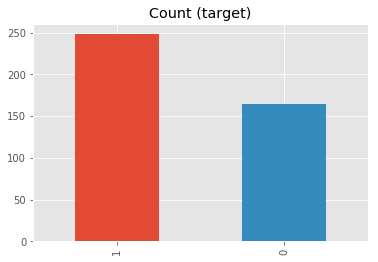

In [194]:
df_class_0_under = data.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Resp.value_counts())

df_test_under.Resp.value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
1    794
0    794
Name: Resp, dtype: int64


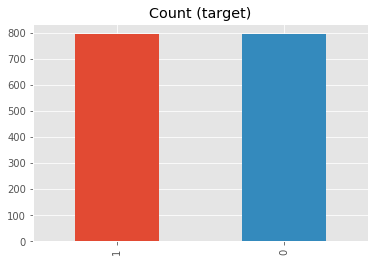

In [195]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Resp.value_counts())

df_test_over.Resp.value_counts().plot(kind='bar', title='Count (target)');

In [202]:
# helper ploting function 

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Removed indexes: [950 189 390  88 314  85 719 728 593 236 781 914 868 177 259 937 430 991
 673  31  89 776 560 709  27 287 145 305 121  93 330  10 712 778 647 322
 245 501 349 836 212 361 722 497 707 258 167 147 965 477 325 842 176 364
 336 184 729 124 973 613 138 240 281 652 190 179 597 536 574 676 235 351
  20 922 227 193 445 164  84 126 581 482 230 474 226 153 972 827 257  77
 518 714 535 116 917 576   5 693  35 328 765 350 284 602  26 916   2 111
 233 103 906 810 156  32 571  71  50 794 201 986 702 767 460 797 225 342
 292 267 237 624 853 306 681 367   3 353 976 182 337 517 742  95 229 352
 685 195  22 800 206 845 199 627 999 170  21 689 253 348 316 232  81 766
 249 893 250 655 220 466 998 635 744 169  69 911 315 357 493 551 285  42
 326 542 825 984 391 762 224 789 637 192  19 131 475 228 761 632 381 958
 335 561  53  45 572 366 871   6 354 355 358 362 365 369 372 373 374 375
 382 383 385 387 388 399 400 403 405 408 413 415 417 418 421 425 426 428
 431 433 437 438 442 443 444 449 4

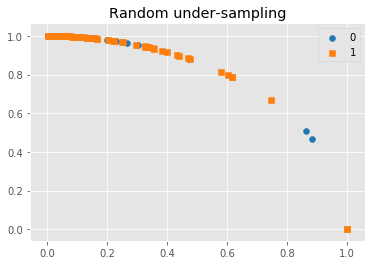

In [203]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

588 new random picked points


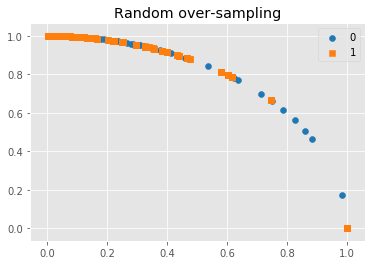

In [204]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

Removed indexes: [  0   1   2   3   4   5   6   7   8  10  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  50  51  52  53  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  85  87  88  89  91  92  93  94  95  97  98  99 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 120 121
 122 123 124 125 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 145 146 147 148 149 151 152 153 154 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 216 217 218
 219 220 221 222 224 225 226 227 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 2

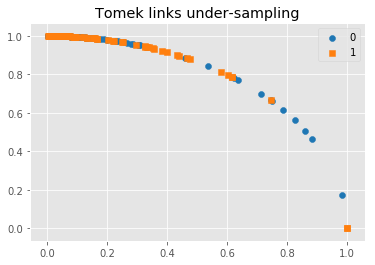

In [205]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

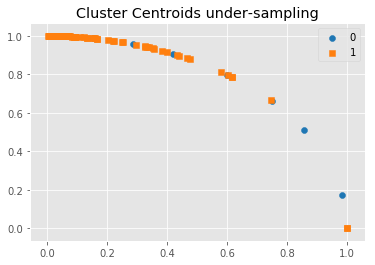

In [206]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

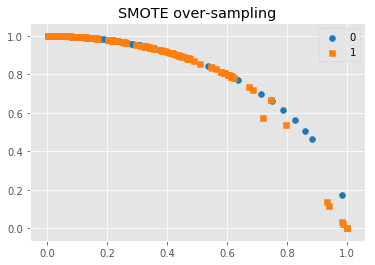

In [207]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

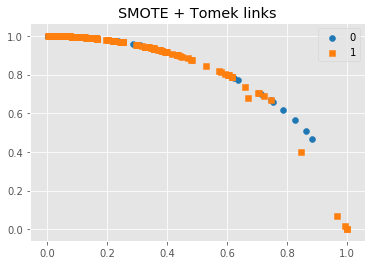

In [208]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

## Feature engenering using FAST proceger for protien sequence processing 

In [386]:
data = pd.read_csv('data/dataraning_new_data.csv')

In [216]:
data.head()

,Unnamed: 0,Resp,VL.t0,CD4.t0,rtlength,pr_A,pr_C,pr_G,pr_R,pr_T,pr_Y,PR_GC,RT_A,RT_C,RT_G,RT_R,RT_T,RT_Y,RT_GC
0,1,0,4.3,145,1005,104,51,67,2,71,2,0.402730,402,167,210,1,1,1,0.378134
1,2,0,3.6,224,909,110,49,65,73,0,0,0.383838,355,151,193,1,3,203,0.381375
2,3,0,3.2,1017,903,105,47,67,2,74,2,0.389078,360,146,181,1,7,201,0.368243
3,4,0,5.7,206,1455,105,49,71,1,71,0,0.405405,586,245,305,1,1,317,0.378527
4,5,0,3.5,572,903,105,50,69,73,0,0,0.400673,353,150,184,2,5,1,0.374439


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 19 columns):
Unnamed: 0    920 non-null int64
Resp          920 non-null int64
VL.t0         920 non-null float64
CD4.t0        920 non-null int64
rtlength      920 non-null int64
pr_A          920 non-null int64
pr_C          920 non-null int64
pr_G          920 non-null int64
pr_R          920 non-null int64
pr_T          920 non-null int64
pr_Y          920 non-null int64
PR_GC         920 non-null float64
RT_A          920 non-null int64
RT_C          920 non-null int64
RT_G          920 non-null int64
RT_R          920 non-null int64
RT_T          920 non-null int64
RT_Y          920 non-null int64
RT_GC         920 non-null float64
dtypes: float64(3), int64(16)
memory usage: 136.6 KB


In [218]:
data.describe()

,Unnamed: 0,Resp,VL.t0,CD4.t0,rtlength,pr_A,pr_C,pr_G,pr_R,pr_T,pr_Y,PR_GC,RT_A,RT_C,RT_G,RT_R,RT_T,RT_Y,RT_GC
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,0.203261,4.315054,272.990217,958.850000,105.532609,47.208696,67.063043,21.679348,33.289130,16.883696,0.390473,379.334783,157.268478,196.441304,22.046739,63.669565,73.039130,0.373724
std,265.725422,0.402644,0.702710,199.699935,207.025358,2.861896,3.030841,4.991434,32.298668,35.849235,30.304199,0.009618,82.592270,35.595367,46.932323,60.044950,94.248875,102.551341,0.005879
min,1.000000,0.000000,2.800000,0.000000,579.000000,80.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.356589,220.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.353434
25%,230.750000,0.000000,3.775000,124.500000,872.250000,104.000000,46.000000,66.000000,1.000000,1.000000,0.000000,0.383838,342.000000,141.000000,178.000000,1.000000,1.000000,1.000000,0.369731
50%,460.500000,0.000000,4.300000,243.000000,903.000000,106.000000,47.000000,67.000000,2.000000,3.000000,1.000000,0.390572,357.000000,149.000000,186.000000,1.000000,3.000000,3.000000,0.373608
75%,690.250000,0.000000,4.800000,379.000000,972.000000,107.000000,49.000000,69.000000,71.000000,73.000000,3.000000,0.397260,389.250000,160.000000,202.000000,3.000000,179.000000,198.000000,0.377752
max,920.000000,1.000000,6.000000,1589.000000,1482.000000,114.000000,54.000000,74.000000,79.000000,79.000000,78.000000,0.419244,597.000000,255.000000,321.000000,307.000000,326.000000,323.000000,0.390828


Same as befor the data needs rescaling.

In [233]:
data.corr()

,Unnamed: 0,Resp,VL.t0,CD4.t0,rtlength,pr_A,pr_C,pr_G,pr_R,pr_T,pr_Y,PR_GC,RT_A,RT_C,RT_G,RT_R,RT_T,RT_Y,RT_GC
Unnamed: 0,1.000000,0.316746,0.082143,0.038613,0.060402,-0.289413,-0.104817,-0.052061,-0.156757,0.037121,0.073843,0.039735,0.055431,0.039726,0.045710,-0.018059,-0.105165,0.024748,0.019547
Resp,0.316746,1.000000,0.363947,-0.127548,0.320095,-0.121435,-0.080273,-0.030747,-0.106768,0.046432,0.054466,-0.029655,0.315671,0.294487,0.269169,-0.045041,-0.118343,0.070142,0.105843
VL.t0,0.082143,0.363947,1.000000,-0.427281,0.327529,-0.010349,-0.011644,0.012650,-0.099714,0.063036,0.018848,-0.040033,0.324758,0.299423,0.300049,-0.085253,-0.080765,0.082630,0.060104
CD4.t0,0.038613,-0.127548,-0.427281,1.000000,-0.297203,-0.022918,0.044449,0.041038,0.086117,-0.024116,-0.044339,0.060032,-0.292327,-0.275972,-0.269580,0.063620,0.058562,-0.054134,-0.101756
rtlength,0.060402,0.320095,0.327529,-0.297203,1.000000,0.004620,0.001332,0.018774,-0.129542,0.045435,0.098628,-0.010285,0.997939,0.938903,0.944121,-0.090145,-0.076606,0.136990,0.485215
pr_A,-0.289413,-0.121435,-0.010349,-0.022918,0.004620,1.000000,0.165435,-0.123698,0.243491,0.000056,-0.188840,-0.495073,0.011044,0.009148,0.011599,0.097611,0.022571,-0.043869,-0.023715
pr_C,-0.104817,-0.080273,-0.011644,0.044449,0.001332,0.165435,1.000000,0.158018,0.062032,-0.024762,-0.053688,0.552580,0.006332,0.015336,0.010107,-0.063966,0.050509,-0.014506,0.011730
pr_G,-0.052061,-0.030747,0.012650,0.041038,0.018774,-0.123698,0.158018,1.000000,-0.024814,-0.007022,-0.022936,0.350968,0.020450,0.019386,0.014290,0.031384,-0.006384,-0.003723,0.028718
pr_R,-0.156757,-0.106768,-0.099714,0.086117,-0.129542,0.243491,0.062032,-0.024814,1.000000,-0.559403,-0.341439,-0.019549,-0.121479,-0.096217,-0.100271,0.188537,0.088849,-0.095437,-0.019180
pr_T,0.037121,0.046432,0.063036,-0.024116,0.045435,0.000056,-0.024762,-0.007022,-0.559403,1.000000,-0.459740,-0.054546,0.047112,0.058270,0.028524,-0.082375,-0.050419,0.053928,-0.026724


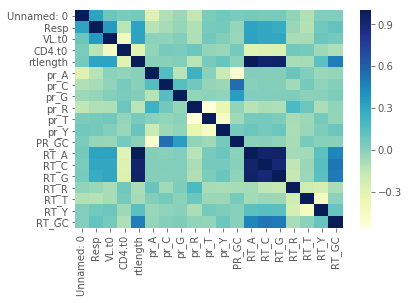

In [234]:
sbn.heatmap(data.corr(),cmap='YlGnBu')

Correlation result indicating some collinearity between the featuers of the FAST method, suggested treatment is dimentionality reduction.

In [387]:
target = data.iloc[:,1:2]
train_data = data.iloc[:,2:]

## Clustering

Clusering the data as a baseline for the classifiers.

In [220]:
from sklearn.cluster import KMeans

kmean = KMeans(2)

In [389]:
kmean.fit(normalize(train_data))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [222]:
kmean.cluster_centers_

array([[3.63631795e-03, 4.10900141e-01, 7.94051920e-01, 9.60596040e-02,
        4.29754079e-02, 6.10467573e-02, 2.29474004e-02, 3.08659843e-02,
        1.25587831e-02, 3.55196022e-04, 3.14276537e-01, 1.30249657e-01,
        1.61540115e-01, 2.75015892e-02, 6.64332312e-02, 5.13279627e-02,
        3.38886164e-04],
       [4.05830518e-03, 1.36597762e-01, 8.70349883e-01, 9.52844587e-02,
        4.26061622e-02, 6.05026062e-02, 1.82560113e-02, 2.93484475e-02,
        1.64861948e-02, 3.52653626e-04, 3.44042989e-01, 1.42845996e-01,
        1.78535107e-01, 1.60700477e-02, 5.25127908e-02, 7.23087503e-02,
        3.37573814e-04]])

In [388]:
# dimensionality redection 

pca = PCA(2)
pca_data = pca.fit_transform(normalize(train_data))

tsne = TSNE(2)
tsne_data = tsne.fit_transform(normalize(train_data))

iso = Isomap(2)
iso_data = iso.fit_transform(normalize(train_data))

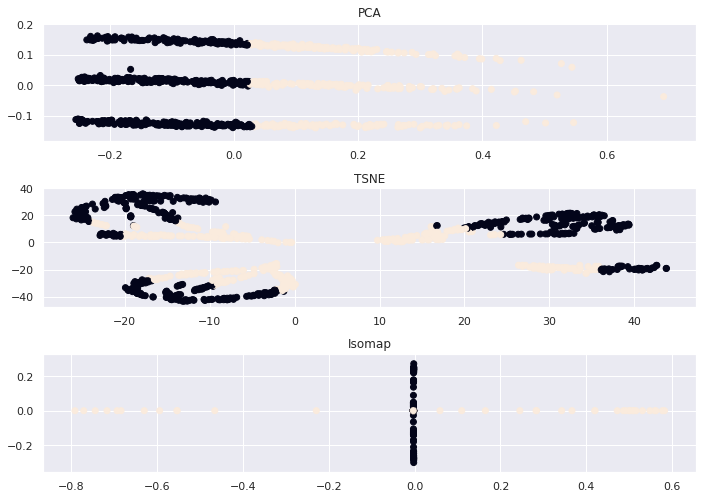

In [390]:
# ploting 
f, (ax1, ax2, ax3) = plt.subplots(3, 1,)
f.subplots_adjust(hspace=0.4)

ax1.set_title('PCA')
ax1.scatter(pca_data[:,0],pca_data[:,1], c= kmean.labels_)

ax2.set_title('TSNE')
ax2.scatter(tsne_data[:,0],tsne_data[:,1], c= kmean.labels_)

ax3.set_title('Isomap')
ax3.scatter(iso_data[:,0],iso_data[:,1], c= kmean.labels_)

In [399]:
target.shape

(920, 1)

In [398]:
pca_data.shape

(920, 2)

In [402]:
pca_data[target['Resp'] == 0]

array([[-1.27395221e-01,  1.42150588e-02],
       [-4.46033228e-02, -1.26024039e-01],
       [ 5.01626417e-01, -1.24392490e-01],
       ...,
       [ 1.54342698e-01,  4.40299922e-04],
       [ 2.13653707e-02,  1.31510737e-01],
       [-2.67226806e-02, -1.30561447e-01]])

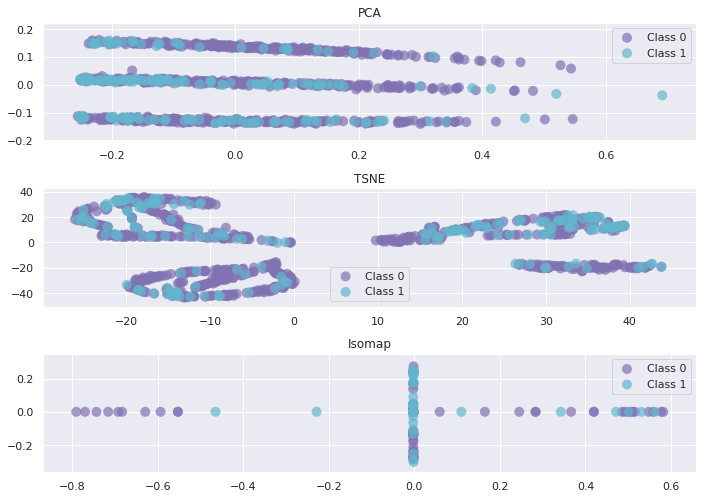

In [408]:
# ploting 
f, (ax1, ax2, ax3) = plt.subplots(3, 1,)
f.subplots_adjust(hspace = 0.4, wspace = 0.2)

ax1.set_title('PCA')
i = 0
for color in ['m', 'c']:
    ax1.scatter(pca_data[target['Resp'] == i][:,0], pca_data[target['Resp'] == i][:,1], c=color, s=100, label=target_lbl[i],
               alpha=0.7, edgecolors='none')
    i+=1
ax1.legend()   

ax2.set_title('TSNE')
i = 0
for color in ['m', 'c']:
    ax2.scatter(tsne_data[target['Resp'] == i][:,0], tsne_data[target['Resp'] == i][:,1], c=color, s=100, label=target_lbl[i],
               alpha=0.7, edgecolors='none')
    i+=1
ax2.legend() 

ax3.set_title('Isomap')
i = 0
for color in ['m', 'c']:
    ax3.scatter(iso_data[target['Resp'] == i][:,0], iso_data[target['Resp'] == i][:,1], c=color, s=100, label=target_lbl[i],
               alpha=0.7, edgecolors='none')
    i+=1
ax3.legend() 

plt.savefig('FAST_DR_scatter.jpg')

In [225]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

In [226]:
print(classification_report(target,kmean.labels_))

             precision    recall  f1-score   support

          0       0.85      0.42      0.56       733
          1       0.24      0.71      0.35       187

avg / total       0.72      0.48      0.52       920



## Modeling

In [227]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True)
print(kf)  

def KFold_train(X,y,kf,clf, metrics, print_report = False):
    kf.get_n_splits(X)
    n, d = kf.n_splits, len(metrics)
    score = np.zeros((n, d))
    i = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train,y_train)
        pred_y = clf.predict(X_test)
        for metric, j in zip(metrics, range(d)):
            score[i,j] = metric(y_test, pred_y)
            
        if print_report:
            print(classification_report(y_test, pred_y))
            print(score[i,:])
        i+=1
    
    return np.mean(score, axis=0)

KFold(n_splits=3, random_state=None, shuffle=True)


In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier

rf_clf = RandomForestClassifier()
svm_clf = SVC()
logr_clf = LogisticRegressionCV()
gp_clf = GaussianProcessClassifier()
gnb_clf = GaussianNB()
qda_clf = QuadraticDiscriminantAnalysis()
gb_clf = GradientBoostingClassifier()

In [229]:
X = normalize(train_data)
y = np.array(target).ravel()

In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [285]:
print('Random Forest:')
print(KFold_train(X,y,kf, rf_clf,[accuracy_score, precision_score, recall_score]))

print('\nSupport Vector Machine:')
print(KFold_train(X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score]))

print('\nLogistic Regression:')
print(KFold_train(X,y,kf, logr_clf,[accuracy_score, precision_score, recall_score]))

print('\nGaussian Process:')
print(KFold_train(X,y,kf, gp_clf,[accuracy_score, precision_score, recall_score]))

print('\nGaussianNB:')
print(KFold_train(X,y,kf, gnb_clf,[accuracy_score, precision_score, recall_score]))

print('\nQuadratic Discriminant Analysis:')
print(KFold_train(X,y,kf, qda_clf,[accuracy_score, precision_score, recall_score]))

print('\nGradient Boosting Classifier:')
print(KFold_train(X,y,kf, gb_clf,[accuracy_score, precision_score, recall_score]))

Random Forest:
[0.79456828 0.49705882 0.18723332]

Support Vector Machine:
[0.79675403 0.         0.        ]

Logistic Regression:


/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.80003264 0.34391534 0.16486196]

Gaussian Process:


/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  meang = Xg.mean(0)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
 

[0.79672564 0.         0.        ]

GaussianNB:
[0.79782206 0.50798012 0.38782392]

Quadratic Discriminant Analysis:
[0.78476791 0.46063748 0.38362203]

Gradient Boosting Classifier:
[0.79782206 0.5070035  0.26207544]


The models experement general improvement in both recal and precision with the FAST featuers from the protiens sequences.

The Top three models are Quadratic Discriminant Analysis, GaussianNB, and Random Forest and Gradient Boosting Classifier.

In [235]:
# print('Random Forest:')
# print(KFold_train(X,y,kf, rf_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # very good balance prediction

# print('\nSupport Vector Machine:')
# print(KFold_train(X,y,kf, svm_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # bad at classifiing the minority class

# print('\nLogistic Regression:')
# print(KFold_train(X,y,kf, logr_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # sometimes bad at classifiing the minority class

# print('\nGaussian Process:')
# print(KFold_train(X,y,kf, gp_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # bad at classifiing the minority class

# print('\nGaussianNB:')
# print(KFold_train(X,y,kf, gnb_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # very good balance prediction

# print('\nQuadratic Discriminant Analysis:')
# print(KFold_train(X,y,kf, qda_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # very good balance prediction

print('\nGradient Boosting Classifier:')
print(KFold_train(X,y,kf, gb_clf,[accuracy_score, precision_score, recall_score], print_report=True)) # very good balance prediction


Gradient Boosting Classifier:
             precision    recall  f1-score   support

          0       0.82      0.92      0.87       245
          1       0.41      0.23      0.29        62

avg / total       0.74      0.78      0.75       307

[0.77850163 0.41176471 0.22580645]
             precision    recall  f1-score   support

          0       0.81      0.92      0.86       239
          1       0.43      0.22      0.29        68

avg / total       0.72      0.76      0.73       307

[0.76221498 0.42857143 0.22058824]
             precision    recall  f1-score   support

          0       0.86      0.94      0.90       249
          1       0.55      0.32      0.40        57

avg / total       0.80      0.82      0.80       306

[0.82352941 0.54545455 0.31578947]
[0.78808201 0.46193023 0.25406139]


In [236]:
from sklearn.ensemble import VotingClassifier

In [ ]:
VotingClassifier()

In [92]:
print(classification_report(target,kmean.labels_))

             precision    recall  f1-score   support

          0       0.76      0.57      0.65       733
          1       0.15      0.30      0.20       187

avg / total       0.64      0.51      0.56       920



In [110]:
# removing collinearity in Variables 
pca_train = PCA(0.95)
pca_train_data = pca_train.fit_transform(X)

print('Number of components: ', pca_train.n_components_)

print('\nQuadratic Discriminant Analysis:')
print('\n Summarized result: ',KFold_train(pca_train_data,y,kf, qda_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # very good balance prediction

Number of components:  5

Quadratic Discriminant Analysis:
             precision    recall  f1-score   support

          0       0.80      0.97      0.88       240
          1       0.56      0.13      0.22        67

avg / total       0.75      0.79      0.73       307

[0.78827362 0.5625     0.13432836]
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       247
          1       0.31      0.18      0.23        60

avg / total       0.72      0.76      0.73       307

[0.75895765 0.30555556 0.18333333]
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       246
          1       0.31      0.27      0.29        60

avg / total       0.73      0.74      0.73       306

[0.74183007 0.31372549 0.26666667]

 Summarized result:  [0.76302045 0.39392702 0.19477612]


In [ ]:
# removing collinearity in Variables 
tsne_train = TSNE(8)
tsne_train_data = tsne_train.fit_transform(X)

print('Number of components: ', tsne_train.n_components)

print('\nQuadratic Discriminant Analysis:')
print('\n Summarized result: ',KFold_train(tsne_train_data,y,kf, qda_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # very good balance prediction

In [114]:
# removing collinearity in Variables 
iso_train = Isomap(n_components=5)
iso_train_data = iso_train.fit_transform(X)

print('Number of components: ', iso_train.n_components)

print('\nQuadratic Discriminant Analysis:')
print('\n Summarized result: ',KFold_train(iso_train_data,y,kf, qda_clf,[accuracy_score, precision_score, recall_score],print_report=True)) # very good balance prediction

Number of components:  5

Quadratic Discriminant Analysis:
             precision    recall  f1-score   support

          0       0.83      0.82      0.83       250
          1       0.25      0.26      0.26        57

avg / total       0.72      0.72      0.72       307

[0.71986971 0.25423729 0.26315789]
             precision    recall  f1-score   support

          0       0.86      0.85      0.85       251
          1       0.35      0.36      0.35        56

avg / total       0.76      0.76      0.76       307

[0.76221498 0.35087719 0.35714286]
             precision    recall  f1-score   support

          0       0.79      0.87      0.83       232
          1       0.39      0.26      0.31        74

avg / total       0.69      0.72      0.70       306

[0.72222222 0.3877551  0.25675676]

 Summarized result:  [0.73476897 0.33095653 0.2923525 ]


In [246]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()

In [247]:
print('\n Summarized result: ',KFold_train(X,y,kf, lda_clf,[accuracy_score, precision_score, recall_score],print_report=True)) 

             precision    recall  f1-score   support

          0       0.84      0.91      0.87       246
          1       0.47      0.33      0.38        61

avg / total       0.77      0.79      0.78       307

[0.79153094 0.46511628 0.32786885]
             precision    recall  f1-score   support

          0       0.83      0.92      0.87       239
          1       0.55      0.34      0.42        68

avg / total       0.77      0.79      0.77       307

[0.79153094 0.54761905 0.33823529]
             precision    recall  f1-score   support

          0       0.87      0.92      0.89       248
          1       0.53      0.40      0.46        58

avg / total       0.80      0.82      0.81       306

[0.82026144 0.53488372 0.39655172]

 Summarized result:  [0.80110778 0.51587302 0.35421862]


In [287]:
rf_clf.feature_importances_.shape

(17,)

In [290]:
train_data.head().shape

(5, 17)

In [291]:
train_data.columns

Index(['VL.t0', 'CD4.t0', 'rtlength', 'pr_A', 'pr_C', 'pr_G', 'pr_R', 'pr_T',
       'pr_Y', 'PR_GC', 'RT_A', 'RT_C', 'RT_G', 'RT_R', 'RT_T', 'RT_Y',
       'RT_GC'],
      dtype='object')

### Featuer importance from RF

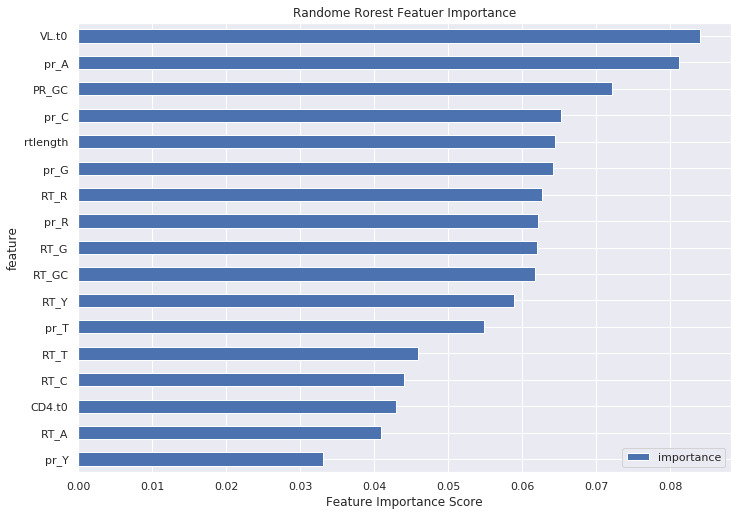

In [293]:
feat_imp = pd.DataFrame({'importance':rf_clf.feature_importances_})    
feat_imp['feature'] = train_data.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
# feat_imp = feat_imp.iloc[:top_n]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title='Randome Rorest Featuer Importance')#, figsize=figsize)
plt.xlabel('Feature Importance Score')
plt.show()

In [318]:
sns.set(style='white')

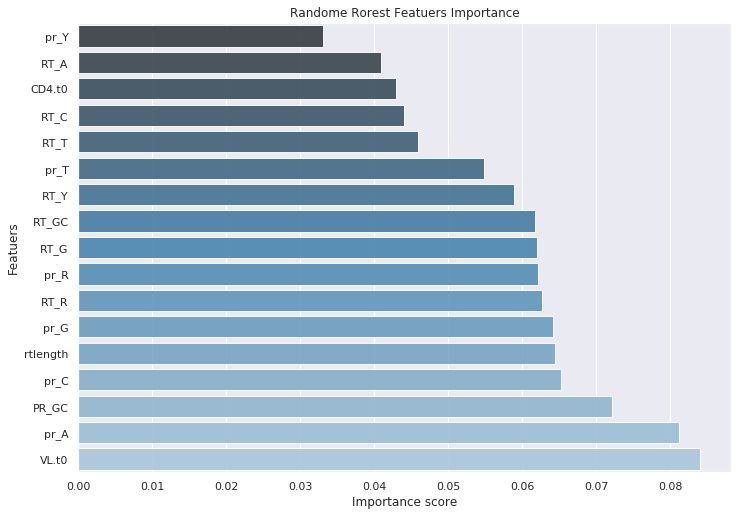

In [294]:
# barplot of the frequency distribution of a categorical feature 
sns.set(rc={'figure.figsize':(11.7,8.27)})
#country_count = cat_data['Country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(feat_imp.values.ravel(),feat_imp.index ,alpha=0.9, palette='Blues_d')

plt.title('Randome Rorest Featuers Importance')
plt.ylabel('Featuers', fontsize=12)
plt.xlabel('Importance score', fontsize=12)
plt.savefig('Extended_Importance_score.jpg')
plt.show()

# Models compination

In [238]:
from sklearn.ensemble import VotingClassifier

In [239]:
vot_clf = VotingClassifier(estimators=[('rf', rf_clf),('qda', qda_clf),('gb',gb_clf)], voting='soft')

In [242]:
X

array([[3.78943649e-03, 1.27783324e-01, 8.85670622e-01, ...,
        8.81264301e-04, 8.81264301e-04, 3.33236350e-04],
       [3.38986770e-03, 2.10925101e-01, 8.55941594e-01, ...,
        2.82488975e-03, 1.91150873e-01, 3.59113848e-04],
       [2.20976584e-03, 7.02291206e-01, 6.23568298e-01, ...,
        4.83386278e-03, 1.38800917e-01, 2.54291044e-04],
       ...,
       [3.59856009e-03, 2.30834464e-01, 8.53122051e-01, ...,
        1.75539517e-03, 1.90460376e-01, 3.31635215e-04],
       [5.39974190e-03, 4.82119813e-03, 8.76493820e-01, ...,
        9.64239625e-04, 2.00561842e-01, 3.60791648e-04],
       [4.42237048e-03, 3.84947248e-01, 8.26179212e-01, ...,
        7.03558940e-03, 3.01525260e-03, 3.68199162e-04]])

In [245]:
print('\n Summarized result: ',KFold_train(X,y,kf, vot_clf,[accuracy_score, precision_score, recall_score],print_report=True)) 

/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  meang = Xg.mean(0)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  meang = Xg.mean(0)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  meang = Xg.mean(0)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  meang = Xg.mean(0)


             precision    recall  f1-score   support

          0       0.81      0.96      0.88       236
          1       0.66      0.27      0.38        71

avg / total       0.78      0.80      0.76       307

[0.7980456  0.65517241 0.26760563]
             precision    recall  f1-score   support

          0       0.83      0.90      0.86       244
          1       0.40      0.27      0.32        63

avg / total       0.74      0.77      0.75       307

[0.76872964 0.4047619  0.26984127]
             precision    recall  f1-score   support

          0       0.85      0.94      0.89       253
          1       0.44      0.23      0.30        53

avg / total       0.78      0.82      0.79       306

[0.81699346 0.44444444 0.22641509]

 Summarized result:  [0.79458957 0.50145959 0.25462067]


/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  meang = Xg.mean(0)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  meang = Xg.mean(0)
/home/merghaney/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  unique_values = np.unique(values)
